In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
path = 'C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 3/Data Visualization/auto_clean.csv'

In [3]:
auto = pd.read_csv(path)

In [4]:
auto.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [5]:
auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
auto_make = sorted(list(set(auto['make'])))
auto_make_dict = dict((c,i) for c, i in enumerate(auto_make))

In [7]:
audi_make_hwy_mpg = auto.loc[(auto['make']=='audi')&(auto['highway-mpg']>20),'highway-mpg']
audi_make_city_mpg = auto.loc[(auto['make']=='audi')&(auto['city-mpg']>10),'city-mpg']
vw_make_hwy_mpg = auto.loc[(auto['make']=='volkswagen')&(auto['highway-mpg']>20),'highway-mpg']
vw_make_city_mpg = auto.loc[(auto['make']=='volkswagen')&(auto['city-mpg']>10),'city-mpg']

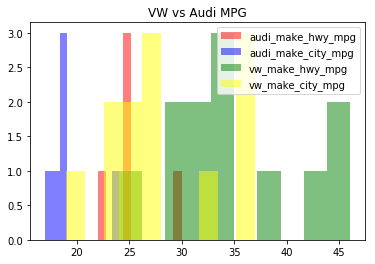

In [8]:
plt.hist(audi_make_hwy_mpg, color='red',  alpha=.5,label='audi_make_hwy_mpg')
plt.hist(audi_make_city_mpg, color='blue',  alpha=.5,label='audi_make_city_mpg')
plt.hist(vw_make_hwy_mpg, color='green',  alpha=.5,label='vw_make_hwy_mpg')
plt.hist(vw_make_city_mpg, color='yellow',  alpha=.5,label='vw_make_city_mpg')
plt.legend(loc='upper right')
plt.title('VW vs Audi MPG')
plt.show()

In [9]:
auto_make_avg = auto.groupby(['make']).mean()


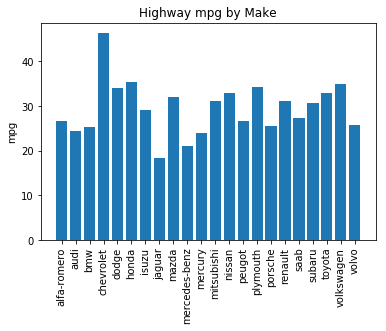

In [10]:
plt.bar(auto_make,auto_make_avg['highway-mpg'])
plt.xticks(rotation=90)
plt.title('Highway mpg by Make')
plt.ylabel('mpg')
plt.show()

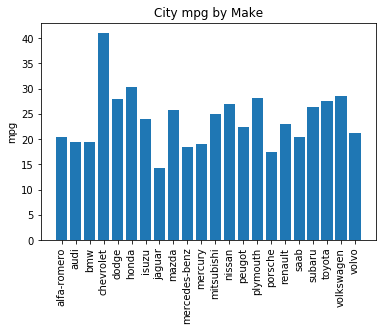

In [11]:
plt.bar(auto_make,auto_make_avg['city-mpg'])
plt.xticks(rotation=90)
plt.title('City mpg by Make')
plt.ylabel('mpg')
plt.show()

In [12]:
volks_make_hwy_mpg_all = auto.loc[(auto['make']=='volkswagen'),'highway-mpg']
volks_make_city_mpg_all = auto.loc[(auto['make']== 'volkswagen'),'city-mpg']

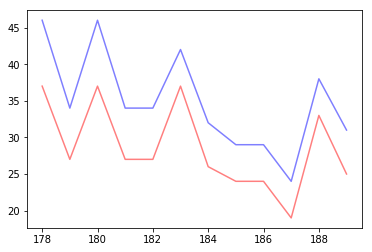

In [13]:
plt.plot(volks_make_hwy_mpg_all,color='blue',alpha=.5)
plt.plot(volks_make_city_mpg_all,color = 'red',alpha=0.5)
plt.show()

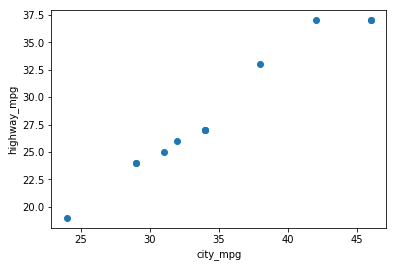

In [14]:
plt.xlabel('city_mpg')
plt.ylabel('highway_mpg')
plt.scatter(volks_make_hwy_mpg_all,volks_make_city_mpg_all)
plt.show()

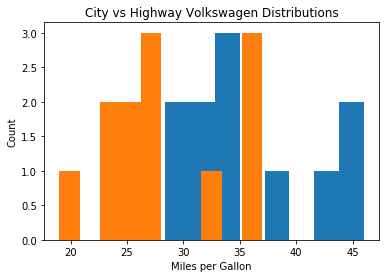

In [15]:
plt.hist(volks_make_hwy_mpg_all)
plt.hist(volks_make_city_mpg_all)
plt.xlabel('Miles per Gallon')
plt.ylabel('Count')
plt.title('City vs Highway Volkswagen Distributions')
plt.show()

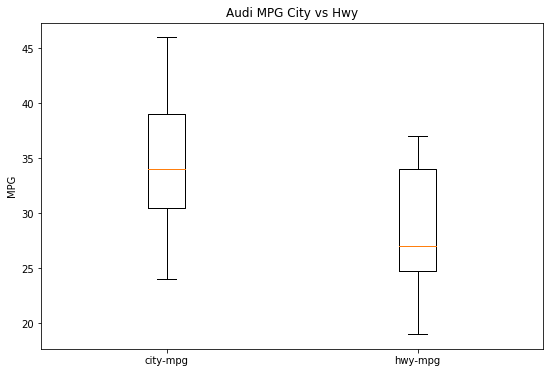

In [16]:
## Create data
np.random.seed(10)
a = np.array(volks_make_hwy_mpg_all)
b = np.array(volks_make_city_mpg_all)
## combine these different collections into a list    
data_to_plot = [a,b]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.xticks([1, 2], ['city-mpg', 'hwy-mpg'])
plt.ylabel('MPG')
plt.title('Audi MPG City vs Hwy')
plt.show()

Two continuous variables three different ways

In [17]:
vw_width= auto.loc[(auto['make']=='volkswagen')&(auto['width']),'width']
vw_height = auto.loc[(auto['make']=='volkswagen')&(auto['height']),'height']

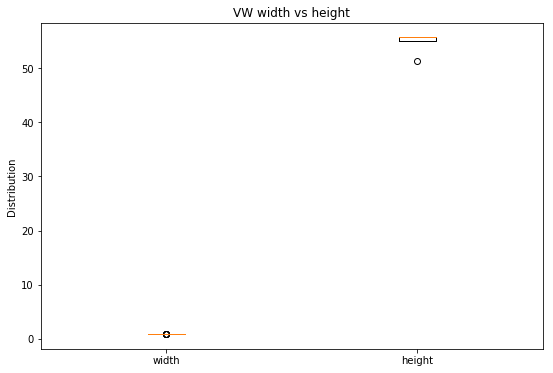

In [18]:
## Create data
np.random.seed(10)
a = np.array(vw_width)
b = np.array(vw_height)
## combine these different collections into a list    
data_to_plot = [a,b]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.xticks([1, 2], ['width', 'height'])
plt.ylabel('Distribution')
plt.title('VW width vs height')
plt.show()

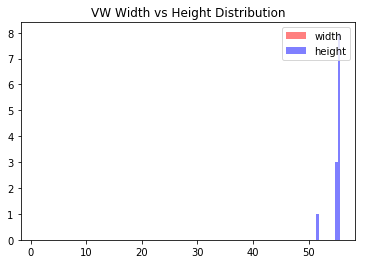

In [19]:
plt.hist(vw_width,color='red',  alpha=.5,label='width')
plt.hist(vw_height,color='blue',  alpha=.5,label='height')
plt.legend(loc='upper right')
plt.title('VW Width vs Height Distribution')
plt.show()

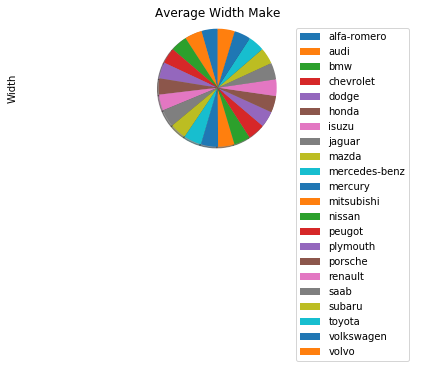

In [20]:
patches, texts = plt.pie(auto_make_avg['width'],shadow=True,startangle=90)
plt.legend(patches, auto_make, loc="best")
plt.title('Average Width Make')
plt.ylabel('Width')
plt.axis('equal')
plt.tight_layout()
plt.show()

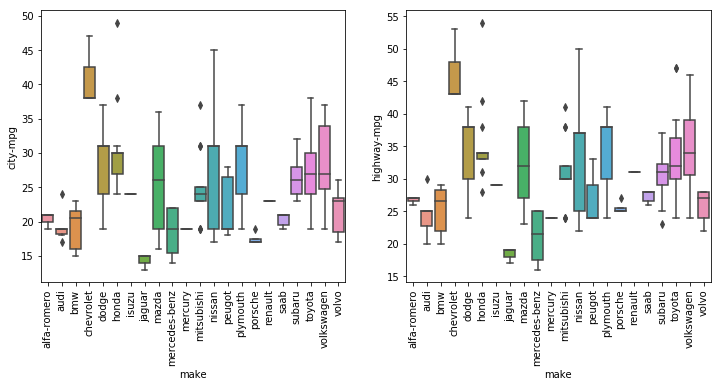

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax = sns.boxplot(x="make", y="city-mpg",data=auto,ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.boxplot(x="make", y="highway-mpg",data=auto,ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [22]:
x = np.array(auto_make_avg['city-mpg'])
y = np.array(auto_make_avg['highway-mpg'],axis=1)


TypeError: 'axis' is an invalid keyword argument for array()

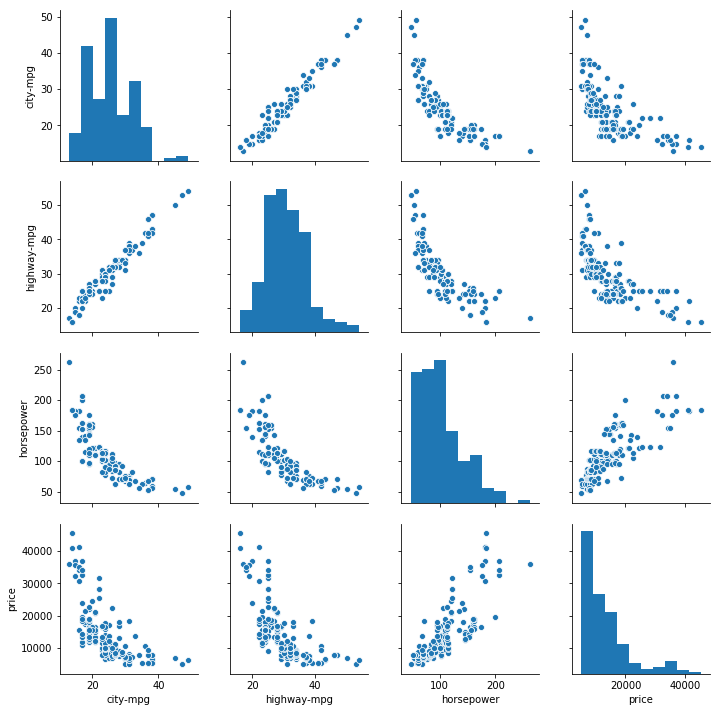

In [23]:
sns.pairplot(auto[['city-mpg','highway-mpg','horsepower','price']]);


# Below is the average estimated distribution of city miles per gallon for the Audi

C:\Users\clyde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


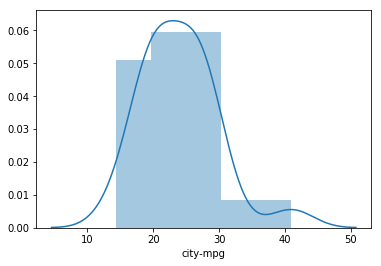

In [24]:
x = np.random.normal(size=100)
sns.distplot(auto_make_avg['city-mpg']);
plt.show()

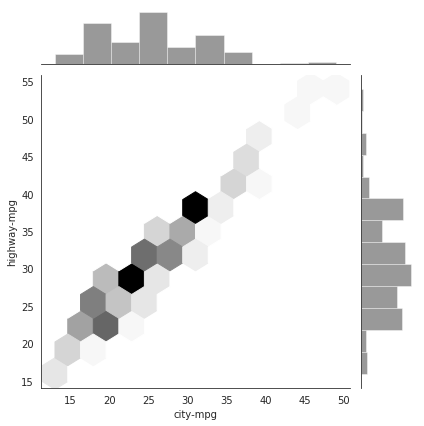

In [25]:
y = auto['highway-mpg']
x = auto['city-mpg']
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

# Below is the Distribution of City MPG vs Highway MPG for all Car Models

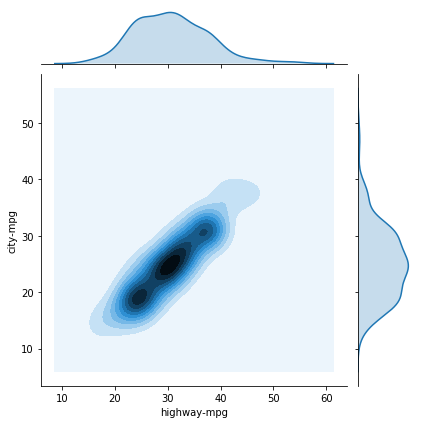

In [26]:
sns.jointplot(x="highway-mpg", y="city-mpg", data= auto, kind="kde");

The above bivariate distribution shows the tendency for cars to have a linear relationship between city mpg and highway mpg. This means that cars with low city mpg ratings will tend to have a proportionally low highway mpg rating. Cars with higher city mpg ratings will have correspondingly high highway mpg rating. Most cars cluster around 25 mpg city and 35 mpg highway

In [29]:
df_auto =auto[['city-mpg','highway-mpg','horsepower','price']]
df_auto.head()
              

,city-mpg,highway-mpg,horsepower,price
0,21,27,111.0,13495.0
1,21,27,111.0,16500.0
2,19,26,154.0,16500.0
3,24,30,102.0,13950.0
4,18,22,115.0,17450.0


In [32]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_auto)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.005       0.97690392 -0.8263254  -0.69000386]
 [ 0.97690392  1.005      -0.80859766 -0.70821573]
 [-0.8263254  -0.80859766  1.005       0.81362244]
 [-0.69000386 -0.70821573  0.81362244  1.005     ]]


C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.51349245]
 [ 0.5133625 ]
 [-0.50465113]
 [-0.46702429]]
Eigenvalue 1: 3.42131683011392
----------------------------------------
Eigenvector 2: 
[[0.46314448]
 [0.43967354]
 [0.24271336]
 [0.73025652]]
Eigenvalue 2: 0.41140288901867267
----------------------------------------
Eigenvector 3: 
[[ 0.71653923]
 [-0.68639163]
 [ 0.09959849]
 [-0.07428463]]
Eigenvalue 3: 0.025873216285820875
----------------------------------------
Eigenvector 4: 
[[-0.09162   ]
 [-0.26835173]
 [-0.82249475]
 [ 0.49304717]]
Eigenvalue 4: 0.1614070645815919
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.85107384 0.10233903 0.00643612 0.04015101]


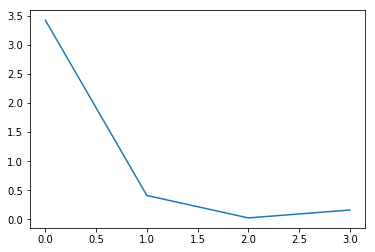

In [34]:
plt.plot(eig_val_cov)
plt.show()

C:\Users\clyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


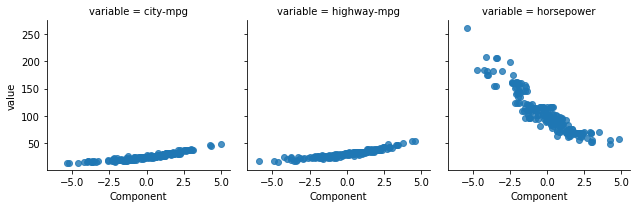

In [40]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_auto[['city-mpg','highway-mpg','horsepower']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable")
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

In [39]:
data_to_plot.shape

(804, 3)